# Kapitel 1. Einstieg in die Welt von Python:


In Ihrer Vorbereitung haben Sie bisher die folgenden Konzepte kennen gelernt:

* Aufbau eines Jupyter-Notebooks (Aufgabe 1).
* Einfache Rechenoperationen (Aufgabe 2 a.)
* Einfache Zeichenketten (engl. Strings) und formatierte Strings (Aufgabe 2 b.).
* Das definieren von Funktionen (Aufgabe 3.)
* Das definieren von Messtabellen.

Hierauf wollen wir an unserem heutigen Versuchstag aufbauen.

## Arbeiten mit Messreihen:

Bisher hat uns das programmieren eher mehr Arbeit gemacht als uns welche abgenommen. Zeitersparnis bekommen wir sofern wir viele Rechnungen hintereinander ausführen müssen. Hierfür gibt es die **for**-Schleife. Diese Schleife führt die gleichen Zeilen eins Codes wiederholt für die Elemente in einer Liste aus:

In [1]:
liste = [1, 2, 3, 4]

for wert in liste:
    print('Wert:', wert)
    rechnung = wert + 2
    
print('Ergebnis:', rechnung)

Wert: 1
Wert: 2
Wert: 3
Wert: 4
Ergebnis: 6


Bei einer Schleife ist darauf zu achten, dass der Anweisungsblock welcher wiederholt ausgeführt werden soll mit 4x Leerzeichen eingrückt wurde. Dies entspricht einmal <img src="images/Tab-Key.png" alt="Tab-Taste" width="100"/>

In [2]:
liste = [1, 2, 3, 4]
print('Hier läuft das Hauptprogramm')

for wert in liste:
    print('Schleife')
    print('Wert:', wert)
    rechnung = wert + 2
    
print('Hier läuft wieder das Hauptprogramm')
rechnung = rechnung + 5
print('Letztes Ergebnis + 5: ', rechnung)

Hier läuft das Hauptprogramm
Schleife
Wert: 1
Schleife
Wert: 2
Schleife
Wert: 3
Schleife
Wert: 4
Hier läuft wieder das Hauptprogramm
Letztes Ergebnis + 5:  11


Statt das Ergebnis lediglich per `print`-Anweisung darstellen zu lassen, können wir auch unser Wissen um Listen benutzen und die berechneten Werte einer neuen Liste anfügen:

In [3]:
# (Funktion haben wir bereits in der Vorbereitung definiert)
def Spannung(Strom, Widerstand):
    '''
    Diese Funktion berechnet die Spannung eines Ohmschen 
    Widerstands.
    
    Args:
        Strom (float): Der gemessene Strom in mA.
        Widerstand (float): Der Wert des verwendeten Widerstands
            in Ohm.
         
    Returns:
        float: Die Berechnete Spannung in V.
    '''
    return Widerstand * Strom/1000

In [4]:
Stromwerte = [101, 105, 98, 87, 112]    # mA
Widerstand = 100   # Ohm

Spannungswerte = []# Einheit? <-- Deshlab Docstrings und Help!
for Strom in Stromwerte:
    res = Spannung(Strom, Widerstand)
    Spannungswerte.append(res)

Spannungswerte

[10.1, 10.5, 9.8, 8.7, 11.2]

Python ermöglicht uns auch eine kompaktere Schreibweise die so genannte "list comprehension": 

In [5]:
Spannungswerte = [Spannung(Strom, 100) for Strom in Stromwerte]
Spannungswerte

[10.1, 10.5, 9.8, 8.7, 11.2]

Wir können auch über mehre Daten gleichzeitig loopen. Hierzu kann die `zip` Anweisung genutzt werden. `zip` verbindet hierbei die einzelnen Elemente einer Liste wie bei einem Reißverschluss miteinander:

In [6]:
Werte1 = ['A', 'B', 'C', 'D']
Werte2 = [0, 1, 2, 3]

for w1, w2 in zip(Werte1, Werte2):
    print(w1, ' und ', w2)

A  und  0
B  und  1
C  und  2
D  und  3


Dies kann zum Beispiel dann hilfreich sein wenn sich mehr als eine Variable ändern soll, z.B. bei einer Messreihe für die Schallgeschwindigkeit in Luft:

In [7]:
# Gemessene Werte:
frequenzen = [30.17, 30.63, 30.01, 29.98, 30.12, 29.87, 29.94] #kHz
wellenlängen = [11.12, 11.34, 11.45, 11.25, 11.01, 11.45, 11.23] # mm

# Variante 1:
schallgeschindigkeiten = []  # m/s

for f, l in zip(frequenzen, wellenlängen):
    schallgeschindigkeiten.append(f*l)

print(schallgeschindigkeiten)

# oder Variante 2:
schallgeschindigkeiten2 = [f*l for f,l in zip(frequenzen, wellenlängen)]
print(schallgeschindigkeiten2)

[335.4904, 347.3442, 343.6145, 337.275, 331.6212, 342.0115, 336.2262]
[335.4904, 347.3442, 343.6145, 337.275, 331.6212, 342.0115, 336.2262]


Wir können auch die `zip`-Anweisung mit mehr als nur zwei Listen verwenden:

In [8]:
l1 = ['a', 'b', 'c']
l2 = [1, 2, 3]
l3 = ['x', 'y', 'z']

for i, j, k in zip(l1, l2, l3):
    print(i, 'und', j, 'und', k)

a und 1 und x
b und 2 und y
c und 3 und z


<div class=task>
    
#### Aufgabe 4.b.: Werte berechnen:
Kopiert eure Aufgabe 4.a. aus der Vorbereitung in das Notebook und berechnet nun für die Messwerte aus Aufgabe 4 a. die Leistung $P$ und den Widerstand $R$ sowie deren Fehler. Nutzt hierfür die ausführliche schrebweise der **for**-Schleife im Fall des Widerstands $R$ und den list-comprehension Syntax für die Leistung $P$. Fügt die berechneten Werte als neue Spalten and die Liste *daten* an. 
<div>

In [9]:
messwert_nummer = list(range(1,7,1))
spannungs_wert = [12., 11.78, 12.56, 12.34, 12.01, 11.94]
strom_werte = [110, 98, 102, 124, 105, 95]
dspannung_wetre = [0.32, 0.15, 0.63, 0.12, 0.20, 0.17]
dstrom_werte = [10]*len(messwert_nummer)
daten = [messwert_nummer, spannungs_wert, strom_werte, dspannung_wetre, dstrom_werte]

def res(i, u):
    r = u/i
    return r

# Widerstand:
widerstand = []
dwiderstand = []

for strom, spannung in zip(daten[2], daten[1]):
    widerstand.append(res(strom, spannung))
daten.append(widerstand)

# Fehler des Widerstands:
for strom, spannung, dstrom, dspannung in zip(daten[2], daten[1], daten[4], daten[3]):
    dwiderstand.append(((dstrom * spannung/(strom)**2)**2 + (dspannung/strom)**2)**0.5)
daten.append(dwiderstand)

# Leistung:
p = [u*i for u,i in zip(daten[1], daten[2])]

# Fehler der Leistung:
dp = [((u*di)**2 + (du*i)**2 )**0.5 for u,i,du,di in zip(daten[1], daten[2], daten[3], daten[4])]
daten.append(p)
daten.append(dp)

for ind, spalte in enumerate(daten): 
    # enumerate ist hilfreich falls man noch zusätzlich einen Index braucht
    print(f'Spalte mit Index {ind}: ', spalte)

Spalte mit Index 0:  [1, 2, 3, 4, 5, 6]
Spalte mit Index 1:  [12.0, 11.78, 12.56, 12.34, 12.01, 11.94]
Spalte mit Index 2:  [110, 98, 102, 124, 105, 95]
Spalte mit Index 3:  [0.32, 0.15, 0.63, 0.12, 0.2, 0.17]
Spalte mit Index 4:  [10, 10, 10, 10, 10, 10]
Spalte mit Index 5:  [0.10909090909090909, 0.12020408163265306, 0.12313725490196079, 0.09951612903225807, 0.11438095238095237, 0.1256842105263158]
Spalte mit Index 6:  [0.010335218792552269, 0.012360854546774054, 0.01356055790616861, 0.008083630548247704, 0.01105869816696616, 0.013350390150906498]
Spalte mit Index 7:  [1320.0, 1154.4399999999998, 1281.1200000000001, 1530.16, 1261.05, 1134.3]
Spalte mit Index 8:  [125.05614738988244, 118.71364706721802, 141.0840444557782, 124.29390330985667, 121.92214729080192, 120.48727111193115]


## Das Darstellen von Messdaten mittels `matplotlib`:
Das Plotten von Daten ist eines der wichtigsten Mittel um eine Fülle von Informationen kompakt und verständlich seinem Gegenüber darzubieten. Gute Plots zu erstellen kann eine regelrechte Kunst sein und ist für ein gutes Paper, bzw. eine gute Bachelor- bzw. Masterarbeit unverzichtbar.  

<figure class="image">
<img src="images/MaterialPythonkurs092018/Xenon1tResults1yearx1texposure.png"  alt="{{ Xenon1t results 2018 }}" width=50%>
<figcaption>Resultate des XENON1T Dunkle Materie Experiments. Die Graphik wurde mittels Matplotlib in Python erstellt. </figcaption>
</figure>

Jede Programmiersprache verfügt über zusätzliche Pakete (im Englischen "packages") welche die Funktionalität der verwendeten Programmiersprache erweitern. **Matplotlib** ist ein umfangreiches Package, welches das Zeichnen von 2D und 3D Grafiken ermöglicht. Alle Parameter und Einstellungen einer Grafik werden entsprechend des Python-Codes eingestellt. Dadurch wird das Erstellen der Grafik reproduzierbar und man kann schnell dieselbe Grafik mit neuen Daten füttern.

Es ist unmöglich alle Möglichkeiten und Einstellungen die euch **Matplotlib** bietet auswendig zu kennen. Mit der Zeit werdet ihr ein solides Grundwissen der gängisten Befehle haben. Für alles weitere hilft euch die [Dokumentation und ihre Beispiele](http://matplotlib.org/). Des Weiteren ist insbesondere hier die **IPython Hilfe** und das **automatische Vervollständigen von Befehlen** besonders hilfreich.

Für das Praktikum wollen wir uns zunächst lediglich drei unterschiedliche Arten von Plots angucken:

* Normale Liniengrafiken
* Plots mit Fehlerbalken
* Histogramme 

Zunächst müssen wir Python mitteilen, dass wir das **Matplotlib** package nutzen möchten:

In [10]:
import matplotlib.pyplot as plt

`import` läd für und aus dem package matplotlib das Modul `pyplot`. Mit Hilfe des Zusatzes `as plt` wird ein alias erstellt. Dieser Alias erspart uns im nachfolgenden Arbeit, wie wir im nachfolgenden Beispiel sehen können:

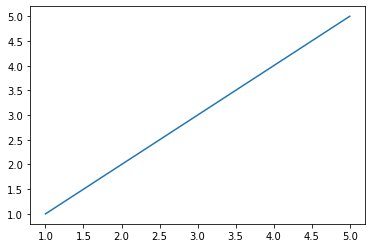

In [11]:
plt.plot([1,2,3,4,5],   # <-- x-Daten
         [1,2,3,4,5]    # <-- y-Daten
        )
plt.show()              # <-- Zeigen des Plots

Hätten wir den Alias nicht definiert hätten wir den folgenden etwas länglichen Code benötigt:

```python
matplotlib.pyplot.plot([1,2,3,4,5], [1,2,3,4,5])
matplotlib.pyplot.show()
```

Innerhalb der Python-Community haben sich ein paar Standards etabliert an welche man sich halten sollte. So ist für `matplotlib.pyplot` der Alias `plt` zu verwenden. 

Im oberen Beispiel habt ihr nun auch bereits gesehen wie wir einfache Liniengrafiken erstellen können. Dabei sieht der Plot noch etwas blass aus. Dies können wir mit ein paar zusätzlichen Befehlen ändern.

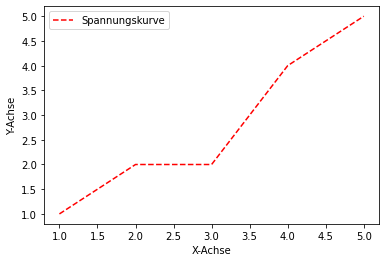

In [12]:
xdaten = [1,2,3,4,5]
ydaten = [1,2,2,4,5]

plt.plot(xdaten, ydaten,        # <-- Wie eben die x und y daten
         color = 'red',         # <-- Farbe der Linie
         linestyle='dashed',    # <-- Linientyp
         label='Spannungskurve' # <-- Name der Linie
        )
plt.xlabel('X-Achse')           # <-- Beschriftung der x-Achse
plt.ylabel('Y-Achse')           # <-- Beschiftung der y-Achse
plt.legend()                    # <-- Hinzufügen der Legend mit den 
                                #     in plot definierten labels
plt.show()

Viele der eben verwendeten Optionen bieten euch unterschiedliche Auswahlmöglichkeiten:

**Linestyle:**
* `''`:  keine Linie
* `'-'`: durchgehende Linie
* `'--'`: gestrichelte Linie
* `'-.'`: Strich-Punktlinie
* `':'`: Punktlinie
* `'steps'`: Treppenfunktion

**Color**:
* red, blue, yellow, 
* RGB Werte von 0 bis 1 (statt von 0 bis 255): (1, 1, 1), (1, 0.2, 0.4)

Darüber hinaus gibt es auch noch andere nützliche Styleoptionen wie `alpha` was die Transparenz eurer Linie ändert (Werte zwischen 0-1), oder `linewidth`-Option mit dessen Hilfe ihr die Linienbreite ändern könnt. 

Auch die anderen Befehle welche wir verwendetet haben verfügen über zusätzliche Optionen:

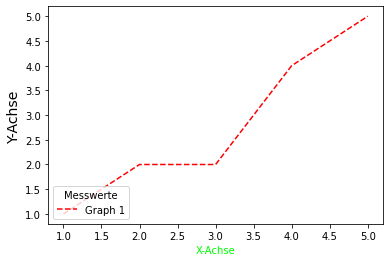

In [13]:
xdaten = [1,2,3,4,5]
ydaten = [1,2,2,4,5]

plt.plot(xdaten, ydaten,
         color = 'red',
         linestyle='dashed',
         label='Graph 1'
        )
plt.xlabel('X-Achse',
           color = (0,1,0)     # <-- Beschriftungsfrabe
          )

plt.ylabel('Y-Achse',
           fontsize=14)        # <-- Beschiftungsgröße

plt.legend(title='Messwerte',  # <-- Legendentitel
           loc=3)              # <-- Legendenposition:
                               # 0: Best,
                               # 1: Oben Rechts
                               # 2: Oben Links
                               # 3: Unten Links
plt.show()

Sofern ihr mehrere Graphen in einen Plot zeichnen möchtet geht dies auch ganz einfach.

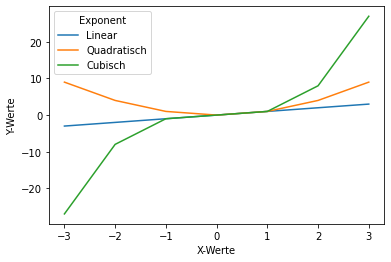

In [14]:
xdaten = [-3, -2, -1, 0, 1, 2, 3]
ydaten1 = xdaten
ydaten2 = [x**2 for x in xdaten]
ydaten3 = [x**3 for x in xdaten]

plt.plot(xdaten, ydaten1, label='Linear')
plt.plot(xdaten, ydaten2, label='Quadratisch')
plt.plot(xdaten, ydaten3, label='Cubisch')

plt.legend(title='Exponent')
plt.xlabel('X-Werte')
plt.ylabel('Y-Werte')
plt.show()

Ihr seht, das `plot` zwischen den angegebene Werte interpoliert. Möchtet ihr eine glatte Kurve zeichnen so müsst ihr die Anzahl an Punkten für die Interpolation erhöhen.

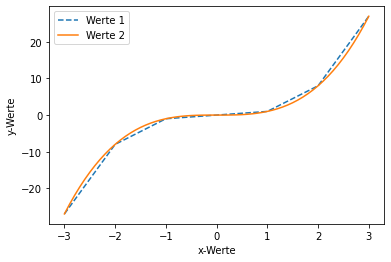

In [15]:
def cubic(x):
    '''
    Funktion welche den cubischen Wert einer Zahl zurück gibt.
    '''
    return x**3


x1 = list(range(-3, 4, 1))            # <- Werte zwischen -3 und 3
x2 = [i/10 for i in range(-30, 31, 1)]  # <- 10 mal mehr Werte

y1 = [cubic(j) for j in x1]
y2 = [cubic(value) for value in x2]


plt.plot(x1, y1, label='Werte 1', linestyle='dashed')
plt.plot(x2, y2, label='Werte 2')
plt.xlabel('x-Werte')
plt.ylabel('y-Werte')
plt.legend()
plt.show()

### Errorbarplot

In der Physik gehören zu jedem gemessen Wert ein Messunsicherheit/Messfehler. Diese Fehler sollten natürlich auch in unseren Grafiken korrekt dargestellt werden. Hierfür können wir den `errorbar`-Plot verwenden.

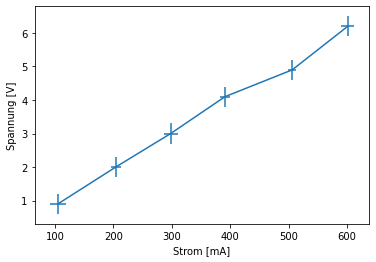

In [16]:
spannung = [0.9, 2.0, 3.0, 4.1, 4.9, 6.2] # [V]
strom = [105, 204, 298, 391, 506, 601] # [mA]
spannung_error = [0.3]*len(spannung)  # Konstanter Ablesefehler [V]
strom_error = [14, 9, 12, 8, 7, 11]      # gemessener schwankender Fehler[mA]

plt.errorbar(strom, spannung,
             xerr=strom_error, 
             yerr=spannung_error,
            ) 

plt.xlabel('Strom [mA]')
plt.ylabel('Spannung [V]')
plt.show()

<div class=task>
    
#### Aufgabe 5.: Erstelle eine `errorbar`-Plot :

Editiert die obere Zelle so, dass ihr mit Hilfe des Befehls 

```python
plt.errorbar()
```

einen Errorbarplot erstellt. Verwende hier für die IPython help-funktion um den exakten Syntax zu erfahren. 

**Erinnerung:**
Ihr könnt die IPython-Hilfe aufrufen in dem ihr euren Cursor innerhalb das Wort errorbar von plt.errorbar bewegt und die Tastenkombination shift + tab verwendet. Lest nun nach wie ihr die x- und y-Werte und deren Fehler an die Funktion übergeben müsst.


Leider ist diese Standardvariante des Errorbar plots noch nicht das was wir möchten. Die Messwerte sind linear interpoliert und die errorbars sehen noch etwas eigenartig aus. Dies können wir jedoch im Handumdrehen ändern. Kümmern wir uns zunächst um die Plotmarker:

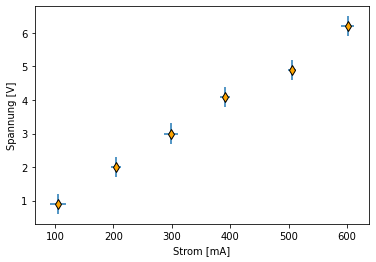

In [17]:
plt.errorbar(strom, spannung,
             xerr=strom_error, 
             yerr=spannung_error,                   
                                       # Änderungen für plotmarker:             | Kurzform:
             linestyle='',             # <-- Schaltet den Linienstyle aus       | ls=''
             marker='d',               # <-- Ändert den Markertyp in Diamanten  | -----
             markerfacecolor='orange', # <-- Ändert die Markerfarbe zu Orange   | mfc='orange'
             markeredgecolor='k',      # <-- Setzt die Kantenfarbe auf schwarz  | mec='k'
             markersize=7              # <-- Ändert die Markergröße             | ms='7'
            )

plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

All die Optionen welche wir hier für die Plotmarker verwendet haben können wir auch in der normalen `plt.plot`-Anweisung verwenden. Dabei gibt es eine ganze fülle an unterschiedlichen [marker Symbole](http://matplotlib.org/api/markers_api.html):
 
* `+`: Plus
* `o`: Kreis
* `*`: Stern
* `,`,`.`: kleiner und sehr kleiner Punkt
* `s`: Quadrat
* `p`: Pentagon
* `h`: Hexagon
* `1`, `2`, `3`, `4`: nach unten, oben, links, rechts zeigendes Dreieck
 
Nach dem wir uns um unsere Marker gekümmert haben müssen wir nun auch noch unsere Fehlerbalken enstprechend anpassen:

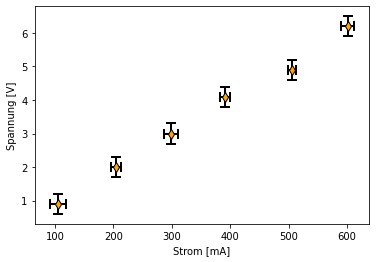

In [18]:
plt.errorbar(strom, 
             spannung,
             xerr=strom_error,
             yerr=spannung_error,     
             ls='',            
             marker='d',              
             mfc='orange', 
             mec='k',      
             ms=7,
                            # Fehlerbalken optionen:
             ecolor='k',    # <-- Ändert die Linienfarbe der errorbars
             elinewidth=2,  # <-- Ändert die Fehlerbalkenbreite
             capsize=5,     # <-- Ändert die Breite der Endkappen der Fehlerbalken
             capthick=2     # <-- Ändert die Dicke der Endkappen
            ) 

plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

### Histogramme:

Ein weiterer Plottyp welcher häufig Verwendung findet ist das Histogramm. Um unser Histogramm mit Pseudozufallszahlen zu bestücken müssen wir diese erst erzeugen. Hierfür können wir das `numpy`-Modul verwenden. `numpy` ist ein weiteres Standardmodul welches viele nützliche Funktionen mit sich bringt. Hier wollen wir uns jedoch nur auf das erstellen von Zufallszahlen beschränken. 

In [19]:
import numpy as np

In [20]:
rnd_numbers = np.random.normal(0,1,1000)  # <-- Hier werden 1000 gausförmig verteile Zufallszahlen
                                          # mit einem Mittelwert von 0 und einer Standardabweichung 
                                          # von 1 erzeugt.

Das histgrom lässt sich ganz einfach mit der `plt.hist`-Anweisung erstellt.

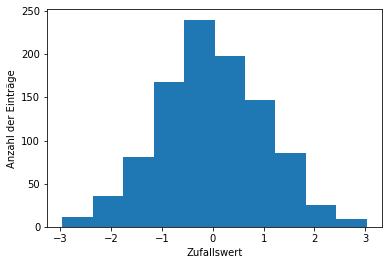

In [21]:
plt.hist(rnd_numbers)

plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

Auch für Histogramme gibt es viele unterschiedlichen Optionen welche ihr entweder mit Hilfe der Help-Funktion oder den Beispielen in der [Matplolibdokumentation](http://matplotlib.org/) herrausfinden könnt.

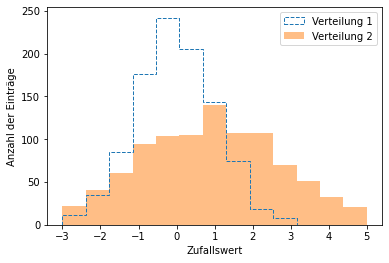

In [22]:
rnd_numbers2 = np.random.normal(1, 2, 1000)


plt.hist(rnd_numbers, 
         bins=13, 
         range=(-3,5),         # <-- Achtung im Gegensatz zur range-Anweisung ist 
                               # das Intervall hier geschlossen [-3, 5]
         histtype='step',      # Ändert den Balkentyp in Stufen
         linestyle='dashed',
         label='Verteilung 1'
        )

plt.hist(rnd_numbers2, 
         bins=13, 
         range=(-3,5),
         alpha=0.5,            # Ändert die Transparenz der Balken 
         label='Verteilung 2'
        )

plt.legend()
plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

Bei Histogrammen solltet ihr immer darauf achten, dass euer binning sinnvoll gewählt ist. Weder zu viele noch zu wenig Bins führen zu einer sinnvollen Darstellung eurer Daten.

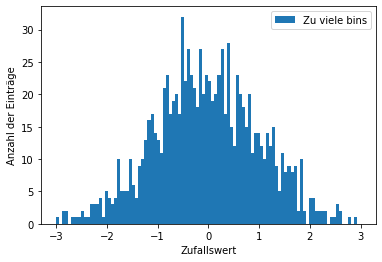

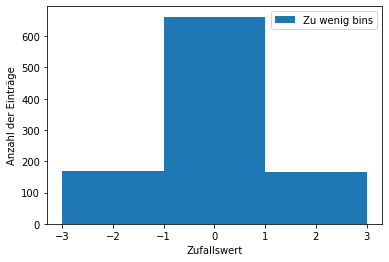

In [23]:
plt.hist(rnd_numbers, 
         bins=100, 
         range=(-3,3),
         label='Zu viele bins'
        )

plt.legend()
plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

plt.hist(rnd_numbers, 
         bins=3, 
         range=(-3,3),
         label='Zu wenig bins'
        )

plt.legend()
plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

Nach dem wir jetzt die verschiedenen Plottypen mit ihren unterschiedlichen Optionen kennen gelernt haben möchten wir diese natürlich auch speichern können. Dies können wir auf zwei unterschiedliche Arten machen.

Entweder ihr macht mit eurer Maus einen Rechtsklick auf eure Grafik und wählt "Grafik speichern als" aus, oder ihr verwendet statt der `plt.show`- die `plt.savefig`-Anweisung dafür.

<div class=task>
    
#### Aufgabe 6.: Erstellen einer gauss'schen Wahrscheinlichkeitsdichte:

Im folgenden wollen wir ein Plot mit einer gauss'schen Wahrscheinlichkeitsdichte erstellen. Geht hierfür wie folgt vor:

1. Erstellt euch 500000 pseudo-Zufallszahlen, welche einer Gaußverteilung mit $µ=5$ und $sigma=2$ folgen.
2. Tragt die Zufallszahlen in ein Histogramm ein und normiert dieses so dass die Gesamtfläche eins beträgt. **Tipp: `plt.hist` hat hierfür einen optionalen Parameter benutzt die Help oder das Internet um herrauszufinden welcher es ist.**
3. Wählt ein geeignete `range` und ein `binning` von 100 für das Histogram.
4. Plottet anschließend die dazugehörige Gaußverteilung als Funktion.  Geht dabei wie folgt vor:
    1. Erstellt eine Gaußfunktion. *Erinnerung:* eine Gaußverteilung ist gegeben durch:
    $$g(x, \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \, \sigma} \exp\bigg( \frac{ -(x - \mu)^2}{2 \sigma^2}\bigg) $$
    **Tipp:** Das Numpy package beinhaltet die Zahlen pi und die Exponentialfunktion bereit. Ihr könnt diese über `np.pi` und `np.exp()` verwenden. 
    2. Erstellt euch eine liste von x-Werten in der von euch gewählten range in 0.1er Schritten. Verwendetet hierfür die `range`-Funktion zusammen mit der listcomprehension.
    3. Erstellt den plot.
Das Ergebnis sollte wie folgt aussehen:

<figure class="image">
<img src="images/MaterialPythonkurs092018/Gaußverteilung.png"  alt="{{ Gaussverteilung }}" width=70%>
</figure>

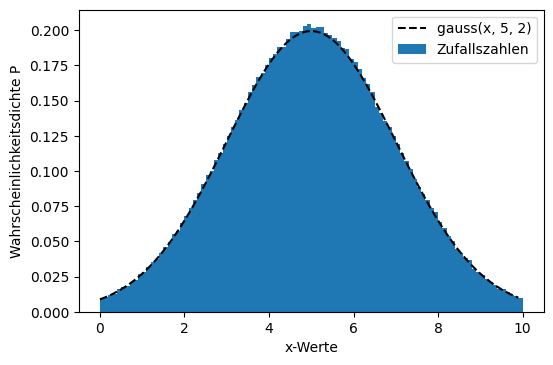

In [24]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.normal(5, 2, 500000)

# Histogram:
plt.figure(dpi=100)
plt.hist(rnd, bins=100, range=(0, 10), density=True, label='Zufallszahlen')

# Gaussfunktion:
def gauss(x, mu, sig):
    return 1/((2 * np.pi)**0.5 * sig) * np.exp(-(x - mu)**2/(2*sig**2))

# x-Werte mittels listcomprehension:
xdata = [i/10 for i in range(0, 100, 1)]

# Plot:
plt.plot(xdata, [gauss(x, 5, 2) for x in xdata], ls='dashed', color='k', label='gauss(x, 5, 2)')
plt.legend()
plt.ylabel('Wahrscheinlichkeitsdichte P')
plt.xlabel('x-Werte')
plt.show()

## Fitten von Messdaten:

### Methode der kleinsten Quadrate

Im folgenden wolllen wir die **Methode der kleinsten Quadrate (Least Squares)** näher beleuchten. Diese Methode wird oft benutzt um eine Funktion $\lambda(x; \ $**$\phi$**$)$ mit den Funktionsparametern $\mathbf{\phi}$ an die gemessenen Punkte **$(x,y)$** anzupassen. Um jedoch die **Methode der kleinsten Quadrate** zu verstehen wollen wir sie erst einmal anschaulich und mathematisch herleiten. Dabei stüzen wir uns im folgenden auf eine Herleitung aus dem Buch **"Statistical Data Analysis"**  von **Glen Cowan**.

In unserem Grundpraktikum haben wir bereits gelernt, dass Messwerte durch Zufallszahlen $x_i$ representiert werden und einer gewissen **Wahrscheinlichkeitsdichtefunktion (probability density function)** $f(x)$ unterliegen. 

<figure class="image">
<img src="images/MaterialPythonkurs092018/PorbDensFun.png"  alt="{{ Beispiel PDF }}" width=70%>
</figure>


Eine **pdf** gibt an mit welcher **Wahrscheinlichkeit ein Wert $x_i$** innerhalb eines **infinitesimalen Intervals $\text{d}x_i$** zu finden ist. Des Weitren gilt das die Gesamtwahrscheinlichkeit gegeben ist durch $\int_S f(x) dx = 1$. 

Nun betrachten wir folgendes Beispiel: In unserem Labor messen wir genau drei mal die Raumtemperartur T. Auch hier gilt, dass unsere Messung der einzelnen $T_i$ einer gewissen **Wahrscheinlichkeitsdichtefunktion** folgen. Betrachtet nun das folgende Bild; welche **Wahrscheinlichkeitsdichtefunktion** passt besser zu den gezeigten Daten und **Warum?**

<figure class="image">
<img src="images/MaterialPythonkurs092018/ProbMaxTemp.png"  alt="{{ Beispiel PDF }}" width=100%>
</figure>

Die rechte Verteilung spiegelt unsere Messdaten besser wieder. Dies können wir auch mathematisch ausdrücken. Für $N$ voreinander unabhängige Zufallszahlen bzw. Messpunkte (in unserem Beispiel $N = 3$) ist die Gesamtwahrscheinlichkeit gegeben durch das Produkt der einzelnen Wahrscheinlichkeitsdichten $f(x_i, \theta)$ multipliziert mit dem jeweiligen infinitesimalen element $dx_i$

$$\prod_{i = 1}^{N} f(x_i,\theta) \  dx_i \text{   für alle } x_i \text{ in } [x_i, x_i + dx_i]$$

wobei $x_i$ in unserem Beispiel den Messpunkten $T_i$ und $f(x_i,\theta)$ unserer Gausverteilung mit $\theta = (\mu, \sigma)$ entspricht. Sprich sofern unsere Werte gut von der jeweiligen **Wahrscheinlichkeitsdichtefunktion** repräsentiert werden, d.h. wir die richtigen Parameter $\theta$ gewählt haben (wie im rechten oberen Plot), gilt 

$$ \prod_{i = 1}^{N} f(x_i,\theta)  dx_i$$ 

ist **maximal**. Da die einzelnen $dx_i$ von unseren Parametern $\theta$ unabhängig sind gilt die gleiche Argumentation auch für 

$$ \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N) = \prod_{i = 1}^{N} f(x_i,\theta)$$ 

wobei $\mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)$ die sogenannte **likely hood function** darstellt.

Wie kommen wir nun von der **likely hood function** auf unsere **Methode der kleinsten Quadrate** und dem fitten einer Funktion $\lambda(x; \ $**$\phi$**$)$ an die gemessenen Punkte **$(x,y)$**? Dazu brauche wir noch einen Zwischenschritt. Oftmals ist es einfacher statt die **likely hood function** zu maximieren die so genannte **log likely hood function**

$$ \log( \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)) = \sum_{i = 1}^{N} \log(f(x_i,\theta))$$

zu maximieren. Dies ist im Grunde das Gleiche, da der logarithmus eine monoton-steigende Funktion ist. Auch in unserem Fall der **Methode der kleinsten Quadrate** benötigen wir die **log likely hood function**. 

Stellt euch nun vor wir haben eine Messung mit $N$ voneinander unabhängigen Messpunkten (x,y). Des Weiteren nehmen wir an, dass alle $x_i$ ohne Fehler sind und das unsere $y_i$ gaußförmig um einen unbekannten Wahrenwert $\lambda_i$ (sprich $\lambda_i$ entspricht dem Erwartungswert $\mu_i$ unserer Gaußverteilung) mit einer bekannten Varianz $\Delta y_i^2$ verteilt sind (Diese Annahme lässt sich mit dem zentralen Grenzwertsatz begründen, so lange der Fehler sich aus der Summe kleinen Fehlern zusammensetzt). Die dazugehörige  **likely hood function** ist dann gegeben durch:

$$ \mathcal{L}(y_1 ... y_N; \lambda_1 ... \lambda_N, \Delta y_1 ... \Delta y_N)) = \prod_{i = 1}^{N}\frac{1}{\sqrt{2 \pi \Delta y_i^2}} \cdot \exp \bigg( \frac{ -(y_i - \lambda_i)^2}{2 \cdot \Delta y_i^2}\bigg)$$

Beziehungsweise die **log likely hood function** mit $\lambda_i = \lambda(x_i; \phi)$ ergibt sich zu

$$ \log(\mathcal{L}(y, \theta)) \approx -\frac{1}{2} \sum_{i = 1}^{N}\bigg( \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}\bigg)$$

wobei die konstanten Terme welche nicht von unserer Funktion $\lambda(x_i; \phi)$ abhängen vernachlässigt worden sind. Durch den Faktor $-\frac{1}{2}$ ist das maximieren dieser **log likely hood function** gleich dem minnimieren von

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$

Diese Funktion ist unsere gesuchte **Methode der kleinsten Quadrate**. Mit ihrer Hilfe kann eine beliebige Funktion $\lambda(x; \phi)$, welche liniear in ihren Parametern $\phi$ ist, an unsere Messdaten $(x,y\pm\Delta y)$ gefittet werden. Dabei stellt der Fitprozess selbst lediglich ein Minimierungsproblem dar. Im folgenden sind unsere Annahmen noch einmal grafisch in einem Beispiel dargestellt.

<figure class="image">
<img src="images/MaterialPythonkurs092018/LeastSquare.png"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>

Es gibt verschiedene Arten von Algorithmen um Minimierungsprobleme zu lösen. Wie diese genau Aufgebaut sind lernt ihr in anderen Progrmmierkursen wie zum Beispiel *Programmieren für Physiker* oder *Computer in der Wissenschaft*. Zum Glück haben uns bereits in Python andere Menschen diese Arbeit abgenommen und wir können aus dem Package `scipy.optimize` die Funktion `curve_fit` verwenden. 

Hierbei stellt curve_fit eine Methode dar, Fit-Funktionen nach der obigen vorgestellten Methode der *kleinsten Quadraten* zu bestimmen. Dies hat zur Folge, dass lediglich die y-Fehler eurer Messwerte für den Fit verwendet werden können. 

In [25]:
from scipy.optimize import curve_fit

Gucken wir uns einen Fit ohne Messfehler an um die Funktion etwas näher kennen zu lernen.

In [26]:
# Und jetzt fitten wir:
para, pcov = curve_fit(Spannung,   # <-- Funktion die an die Messdaten gefittet werden soll
                       strom,      # <-- gemessenen "X"-Werte
                       spannung    # <-- gemessenen "Y"-Werte 
                      )

print(para[0])
print(pcov[0,0]**0.5)

print(f'Widerstand R {para[0]:.2f} +/- {pcov[0,0]**0.5:.2f} Ohm')

10.098259801145538
0.15780378609977405
Widerstand R 10.10 +/- 0.16 Ohm


Ihr seht `curve_fit` gibt uns zwei unterschiedliche Listen zurück. Die erste Liste `para` beinhaltet die berechneten Fitparameter. `pcov` hingegen ist eine [Kovarianzmatrix](https://de.wikipedia.org/wiki/Kovarianzmatrix) auf deren Diagonalen ihr die Varianzen ($\sigma^2$) der einzelnen Parameter findet (auf der Nebendiagonalen befinden sich die Kovarianzen). D.h. bei einer Funktion mit drei Parametern `def f(x, p1, p2, p3):` würde `para` und `pcov` allgemein so aussehen:

```
para = [p1, p2, p3]
pcov = [[cov_1,1, cov_1,2, cov_1,3], 
        [cov_2,1, cov_2,2, cov_2,3],
        [cov_3,1, cov_3,2, cov_3,3]]
```
wobei `cov_i,i` wie bereits erwähnt die einzelnen Kovarianzen bzw. Varianzen sind. Aber was genau macht jetzt curve_fit eigentlich um auf diese Werte zu kommen? Wie bereits erklärt basiert `curve_fit` auf der Methode der kleinsten Quadrate. D.h. die Funktion probiert etliche verschiedene Varianten eurer Parameter durch bis es die Kombination gefunden hat bei der das $\chi^2$ klein wird. Gucken wir uns doch mal ein paar Zwischenschritte für unser Beispiel des ohm'schen Widerstandes an: 

<figure class="image">
<img src="images/MaterialPythonkurs092018/Fitting_gif.gif"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>

Nach dem wir nun wissen, was genau `curve_fit` macht wollen wir unser Resultat etwas schöner darstellen:

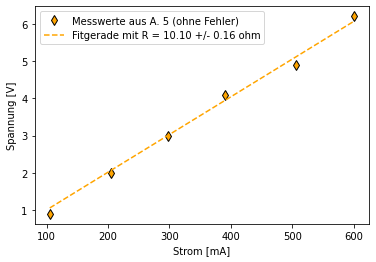

In [27]:
plt.plot(strom, 
             spannung,    
             ls='',            
             marker='d',              
             mfc='orange', 
             mec='k',      
             ms=7,
             label='Messwerte aus A. 5 (ohne Fehler)'
            ) 
plt.plot(strom, 
         [Spannung(value, para[0]) for value in strom], 
         ls ='dashed',
         color='orange',
         label = f'Fitgerade mit R = {para[0]:0.2f} +/- {pcov[0,0]**(1/2):0.2f} ohm'
        )

plt.legend()
plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

Das Ergebnis sieht bereits ganz gut aus, allerdings kennt hier unsere Funktion `curve_fit` die Fehler unserer Messwerte noch garnicht. Da dies sehr unphysikalisch ist lasst uns das ganze nochmal mit Unsicherheiten wiederholen: 

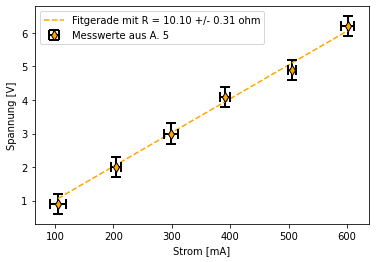

In [28]:
para2, pcov2 = curve_fit(Spannung,   
                       strom,      
                       spannung,
                       sigma=spannung_error,   # <-- Diesesmal mit Fehler
                       absolute_sigma=True     # <-- Diesen Option müssen wir auf Wahr setzen, da 
                                               # wir in der Regel absolute und keine relativen 
                                               # Unsicherheiten messen.
                      )

plt.plot(strom, 
         [Spannung(value, para2[0]) for value in strom], 
         ls ='dashed',
         color='orange',
         label = f'Fitgerade mit R = {para2[0]:0.2f} +/- {pcov2[0,0]**(1/2):0.2f} ohm'
        )
plt.errorbar(strom, 
             spannung,
             xerr=strom_error,
             yerr=spannung_error,     
             ls='',            
             marker='d',              
             mfc='orange', 
             mec='k',      
             ms=7,
             ecolor='k',    
             elinewidth=2,  
             capsize=5,     
             capthick=2,     
             label='Messwerte aus A. 5'
            ) 


plt.legend()
plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

Wie ihr sehen könnt ist der Wert für den Widerstand zwar gleich geblieben, jedoch die Unsicherheit des Wertes hat sich erhöht.

Wie gut denkt ihr fittet unsere obige Funktion unsere Messdaten? Sehr gut? Gut? Befriedigend? Oder doch eher schlecht?   Wäre es nicht gut ein Maß für die Güte des Fits zu haben? Wie könnte ein solches Maß aussehen?

Ihr habt das entscheiden Kriterium bereits kennen gelernt, bei der Methode der kleinsten Quadrate geht es darum das  $\chi^2$ zu minimieren sprich klein zu machen. Gucken wir uns hierzu erst noch einmal an wie sich das $\chi^2$ berechnet:

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$

Dies bedeute in unserem Fall:

$$ \chi(R)^2 = \sum_{i = 1}^{N} \frac{ (U_i - u(I_i; R))^2}{\Delta U_i^2}$$

wobei hier groß $U$ unsere gemessenen Spannung und klein $u$ unsere Funktion entspricht.

In [29]:
chi_2 = [ (u - Spannung(i, para2[0]))**2/du**2 for i,u,du in zip(strom, spannung, spannung_error)]
chi_2 = sum(chi_2)
print(f'Das chi-qudrat ist {chi_2:.2f}')

Das chi-qudrat ist 1.26


Wie vergleicht sich dieses $\chi^2$ nun mit einer Funktion welche unsere Daten schlechter beschreibt. Zum Beispiel sofern wir die Spannung über die Funktion 

$$ U(R,I) = R \cdot I $$

$$ U(R,I) = R \cdot I + U0 $$

$$ U(R,I) = R \cdot I^2 $$

beschreiben würden.

In [30]:
def Spannung2(I, R):
    return R * I**2



para3, pcov3 = curve_fit(Spannung2,
                         strom,
                         spannung,
                         sigma=spannung_error,
                         absolute_sigma=True
                        )

chi_2_new = [ (u - Spannung2(I, *para3))**2/du**2 for I,u,du in zip(strom, spannung, spannung_error)]
chi_2_new = sum(chi_2_new)
print(f'Chi-qudrat nach URI:  {chi_2:.2f}\nChi-qudrat nach URI-Parabel: {chi_2_new:.2f}')

Chi-qudrat nach URI:  1.26
Chi-qudrat nach URI-Parabel: 60.68


Wie ihr sehen könnt ist das $\chi^2$ für unsere zweite Funktion etwas größer als für das klassische ohm'sche Gesetzt. Somit würden wir unsere zweiten Ansatz verwerfen. 

Damit man für einen gegebene Datensatz nicht hunderte von verschiedene Funktionen durchprobieren muss gibt es für das $\chi^2$ eine allgemeine Faustregel, welche den berechneten $\chi^2$-Wert mit der Anzahl unserer Freiheitsgrade vergleicht. Die Anzahl an Freiheitsgrade ist allgemeinhin gegeben als *Anzahl der Messwerte - Anzahl der Funktionsparameter* ($m - n$).

1. Sofern  $\chi^2/\text{ndof} >> 1$: sollte die Hypothese bzw. die Fitfunktion angezweifelt werden. Sie beschreibt in diesem Fall die Messdaten nur unzureichend. (Bzw. sollte $\chi^2/\text{ndof} > 1$ kann dies auch bedeuten, dass eure Unsicherheiten unterschätzt sind)
2. Sofern $\chi^2/\text{ndof} \approx 1$: beschreibt die Hypothese bzw. die Fitfunktion die Daten wie erwartet und wird nicht abgelehnt. 
3. Falls $\chi^2/\text{ndof} << 1$ beschreibt die Hypothese bzw. die Fitfunktion die Daten wesentlich besser als erwartet. In diesem Fall heißt es nicht, dass unsere Hypothese falsch ist, aber man sollte überprüfen ob die gemessenen Fehler nicht überschätzt worden sind (oder eine Korrelation zwischen denn Messfehlern vor liegt).  

Sofern ihr eine Arbeit schreibt und eure **Goodness-of-the-Fit** ($\chi^2/\text{ndof}$) angeben wollt so gebt immer beides an, das $\chi^2$ und die Anzahl an Freiheitsgraden ndof. Beide Werte getrennt habne einen größeren Informationsgehalt als der Resultierende Quotient (genaueres lernt ihr in z.B. in der Vorlesung *Statistik, Datenanalyse und Simulationen* im Master).

<div class=task>
    
#### Aufgabe 7.: PGP Auswertung:

Jetzt seid ihr ein letztes mal gefordert. In dieser Aufgabe wollen wir alles was wir heute gelernt haben nochmal reflektieren und anwenden. Erstellt hierfür ein neues Jupyter-Notebook und bearbeitet die Aufgaben im Skript. Sofern ihr Fragen bzw. Probleme habt vergesst nicht auf die folgenden Hilfsmöglichkeiten zurückzugreifen:

1. Verwenden der IPython-Hilfe unter Verwendung der shift + tab Tasten.
2. Die ausführlichen Dokumentation von Python und das Angebot etlicher nützlicher Hilfsbeiträge in verschiedenen Foren (z.B. stackoverflow) im Internet.
3. Fragt bei den Assistenten nach während der Stunde nach bzw. nutzt den Emailkontakt auf der [gitlab Seite](https://gitlab.rlp.net/hoek/pgp1-python-einfuehrung/tree/master). 
